# İçerik

1. Sınıflandırma ve Regresyon Ağaçları (CART)
2. Bagging
3. Random Forest 
4. Gradient Boosting Machine(GBM)
5. eXtreme Gradient Boosting (XGBoost)
6. LightGBM
7. Category Boosting (CatBoost)

# Sınıflandırma ve Regresyon Ağaçları (CART)

Amaç veri setleri içerisindeki karmaşık yapıları basit karar yapılarına dönüşmektürmektir. Heterojen veri setleri belirlenmiş bir hedef değişkene göre homojen alt gruplara ayrılır. (Breiman 1984)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import warnings 
warnings.filterwarnings('ignore')

## Veri Ön İşleme

In [2]:
hitters = pd.read_csv('Hitters.csv')
df = hitters.copy()
df = df.dropna()
dummies = pd.get_dummies(df.select_dtypes(["object"])) 
y = df['Salary']
X_ = df.drop(['Salary', 'League', 'NewLeague', 'Division'], axis=1).astype("float64")
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# tek değişken ile eğitim için veri seti
X_train_1 = pd.DataFrame(X_train["Hits"])
X_test_1 = pd.DataFrame(X_test["Hits"])

## Model

In [3]:
# Tek değişken için model
cart_model_1 = DecisionTreeRegressor().fit(X_train_1, y_train)
# Tüm değişkenler için model
cart_model = DecisionTreeRegressor().fit(X_train, y_train)

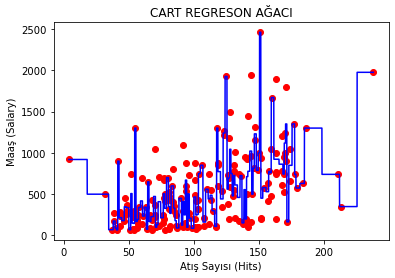

In [4]:
X_grid = np.arange(min(np.array(X_train_1)), max(np.array(X_train_1)), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train_1, y_train, color = 'red') 
plt.plot(X_grid, cart_model_1.predict (X_grid), color = 'blue')
plt.title('CART REGRESON AĞACI')
plt.xlabel('Atış Sayısı (Hits)') 
plt.ylabel('Maaş (Salary)');

In [5]:
# Karar yapısını verir
from skompiler import skompile
print(skompile(cart_model_1.predict).to('python/code'))

((920.0 if x[0] <= 18.0 else ((500.0 if x[0] <= 34.5 else (70.0 if x[0] <= 
    38.0 else 175.0) if x[0] <= 39.5 else 90.0 if x[0] <= 40.5 else 67.5) if
    x[0] <= 41.5 else 900.0 if x[0] <= 42.5 else (((((215.55566666666667 if
    x[0] <= 44.5 else 180.0) if x[0] <= 46.5 else 347.5 if x[0] <= 48.0 else
    337.5) if x[0] <= 50.0 else 70.0) if x[0] <= 51.5 else 507.5) if x[0] <=
    52.5 else 150.0 if x[0] <= 53.5 else 146.83333333333334) if x[0] <= 
    54.5 else 1300.0 if x[0] <= 55.5 else (170.0 if x[0] <= 56.5 else 
    193.75) if x[0] <= 57.5 else ((((((340.0 if x[0] <= 59.0 else 418.5) if
    x[0] <= 60.5 else 235.0 if x[0] <= 62.0 else 341.667) if x[0] <= 63.5 else
    75.0) if x[0] <= 64.5 else 650.0) if x[0] <= 65.5 else 170.0 if x[0] <=
    67.0 else 228.66666666666666) if x[0] <= 69.0 else 472.5) if x[0] <= 
    70.5 else (100.0 if x[0] <= 71.5 else 130.0) if x[0] <= 72.5 else 
    409.16650000000004 if x[0] <= 74.5 else 215.0) if x[0] <= 76.5 else (((
    505.0 if x[0] <= 

In [6]:
cart_model_1 = DecisionTreeRegressor(max_leaf_nodes=3).fit(X_train_1, y_train)

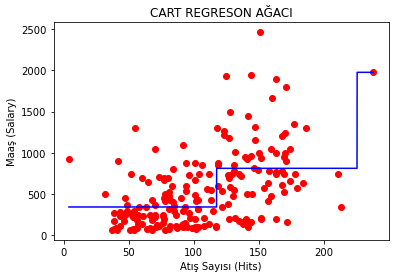

In [7]:
X_grid = np.arange(min(np.array(X_train_1)), max(np.array(X_train_1)), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train_1, y_train, color = 'red') 
plt.plot(X_grid, cart_model_1.predict (X_grid), color = 'blue')
plt.title('CART REGRESON AĞACI')
plt.xlabel('Atış Sayısı (Hits)') 
plt.ylabel('Maaş (Salary)');

In [8]:
# Karar yapısını verir
from skompiler import skompile
print(skompile(cart_model_1.predict).to('python/code'))

(345.2011551724138 if x[0] <= 117.5 else 813.0988 if x[0] <= 225.5 else 1975.0)



## Tahmin

In [9]:
# Tek değişken
y_pred = cart_model_1.predict(X_test_1)
np.sqrt(mean_squared_error(y_test, y_pred))

460.0663148428844

In [10]:
# Tüm değişkenler
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

443.03497627331865

## Tuning

In [11]:
cart_params = {'max_depth': [1,3,5,8,10],
              'min_samples_split': [2,3,5,10,20,50]}

In [12]:
cart_cv = GridSearchCV(cart_model, cart_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    4.1s finished


In [13]:
cart_cv.best_params_

{'max_depth': 5, 'min_samples_split': 50}

In [14]:
cart_tuned = DecisionTreeRegressor(
    max_depth= cart_cv.best_params_['max_depth'], 
    min_samples_split= cart_cv.best_params_['min_samples_split']).fit(X_train, y_train)

In [15]:
y_pred = cart_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

361.0876906511434

# Bagging

Temeli bootstrap yöntemi ile oluşturulan birden fazla karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır. (Breiman 1996)

## Model

In [16]:
bag_model = BaggingRegressor(bootstrap_features= True).fit(X_train, y_train)

In [17]:
bag_model.n_estimators

10

In [18]:
bag_model.estimators_

[DecisionTreeRegressor(random_state=1739858831),
 DecisionTreeRegressor(random_state=1169844786),
 DecisionTreeRegressor(random_state=582877541),
 DecisionTreeRegressor(random_state=1780488635),
 DecisionTreeRegressor(random_state=1756564727),
 DecisionTreeRegressor(random_state=225303024),
 DecisionTreeRegressor(random_state=1351116622),
 DecisionTreeRegressor(random_state=1867766336),
 DecisionTreeRegressor(random_state=1240335654),
 DecisionTreeRegressor(random_state=1004342844)]

## Tahmin

In [19]:
y_pred = bag_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

335.86265352867787

In [20]:
# Ağaçlardan birinine tahmin yaptırma
second_tree_pred = bag_model.estimators_[1].fit(X_train, y_train).predict(X_test)
np.sqrt(mean_squared_error(y_test, second_tree_pred))

534.3150371361904

## Tuning

In [21]:
bag_params = {"n_estimators": range(2,20)}

In [22]:
bag_cv = GridSearchCV(bag_model, bag_params, cv=10).fit(X_train, y_train)
bag_cv.best_params_

{'n_estimators': 13}

In [23]:
bag_tuned = BaggingRegressor(n_estimators = bag_cv.best_params_['n_estimators']).fit(X_train, y_train)

In [24]:
y_pred = bag_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

337.05138949096516

# Random Forest 

Temeli birden çok karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır.(Breiman 2001)

* Random Forests Bagging(Breiman, 1996) ile Random Subspace(Ho, 1998) yöntemlerinin birleşimi ile oluşmuştur.

    * Bagging(Bootstrap Aggregating): Temeli bootstrap yöntemi ile oluşan birden fazla karar ağacının ürettiği tahminleri bir araya getirilerek değerlendirilmesine dayanır. Baggiing yöntemi Random Forests algoritmasının özel bir halidir. Not: Bootstrap Yöntemi, istatistik alanında sıklıkla kullanılan yöntemlerin başında gelmektedir. Bootstrap yöntemleri ya da algoritmalarındaki asıl amaç veriden, büyük veri setleri oluşturmak (üretmek) ve yeniden örnekleme yapmaktır.

    * Random Subspace: Makine öğreniminde rasgele altuzay yöntemi, bir kümedeki tahmin ediciler arasındaki korelasyonu, özellik kümesi yerine rastgele özellik örnekleri üzerinde eğiterek azaltmaya çalışan bir topluluk öğrenme yöntemidir.

* Ağaçlar için gözlemler bootstrap rastgele örnek seçim yöntemi ile değişkenler random subspace yöntemi ile seçilir.

* Karar ağacının her bir düğümünde en iyi dallara ayırıcı değişiken tüm değişkenler arasından rastgele seçilen daha az sayıdaki değişken arasından seçilir.

* Ağaç oluşturmada veri setinin 2/3'ü kulllanılır. Dışarda kalan veri ağaçların performans değerlendirmesi ve değişken öneminin belirlenmesi için kullanılır.

* Her düğüm noktasında rastgele değişken seçimi yapılır.(sınıflandırma için √p)

* Nihai tahmin için ağaçlardan tahmin değeri talep edilirken her bir ağacın daha önceden hesaplanan hata oranları göz önüne alınarak ağırlık verilir.

## Model

In [25]:
rf_model = RandomForestRegressor(random_state=42).fit(X_train, y_train)

In [26]:
rf_model.n_estimators

100

## Tahmin

In [27]:
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

345.00286717448006

## Tuning

In [28]:
rf_params= {'n_estimators': [100,200,500,1000],
            'max_features': [3,5,7,8],
            'min_samples_split':[2,5,10,20]}

In [29]:
rf_cv = GridSearchCV(rf_model, rf_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   51.8s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  3.8min finished


In [30]:
rf_cv.best_params_

{'max_features': 3, 'min_samples_split': 20, 'n_estimators': 500}

In [31]:
rf_tuned = RandomForestRegressor(n_estimators=rf_cv.best_params_['n_estimators'],
                                max_features=rf_cv.best_params_['max_features'],
                                min_samples_split=rf_cv.best_params_['min_samples_split']).fit(X_train, y_train)

In [32]:
y_pred = rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

345.33939031467094

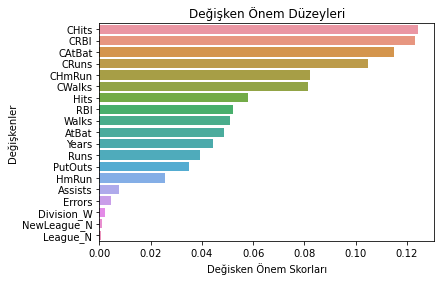

In [33]:
import seaborn as sns
feature_imp = pd.Series(
    rf_tuned.feature_importances_,
    index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değisken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title('Değişken Önem Düzeyleri')
plt.show()

# Gradient Boosting Machine(GBM)

Boosting Yöntemleri

    Zayıf öğrenicileri bir araya getirip güçlü bir öğrenici ortaya çıkarmak fikrine dayanır. (Kearns ve Valiant 1990)
    
Adaptive Boosting (AdaBoost)

    Zayıf sınıflandırıcıların bir araya gelerek güçlü bir sınıflandırıcı oluşturması fikrini hayata geçiren algoritmadır. (Schapires ve Freund 1996-1999)

Gradient boosting

Regresyon ve sınıflandırma problemleri için, genellikle karar ağaçları olan zayıf tahmin modelleri topluluğu şeklinde bir tahmin modeli üreten bir makine öğrenme tekniğidir. Modeli, diğer arttırıcı yöntemlerin yaptığı gibi aşamalı bir şekilde inşa eder ve keyfi farklılaşabilir bir kayıp fonksiyonunun optimizasyonuna izin vererek onları genelleştirir.
        
        AdaBoost'un sınıflandırma ve regresyon problemlerine kolayca uyarlanabilen genelleştirilmiş versiyonudur. Artıklar üzerine tek bir tahminsel model formunda olan modeller serisi kurulur. (2001 Friedman)
   


GBM'in Özellikleri

   * Gradint boosting tek bir tahminsel model formunda olan modeller serisi oluşturur.
   * Seri içerisindeki bir model serideki bir önceki modelin tahmin artıklarının/hatalarının üzerine kurularak(fit) oluşturulur.
   * GBM diferansiyellenebilen herhangi bir kayıp fonksiyonunu optimize edebilen Gradient Descent algoritmasını kullanır.
   * GBM bir çok temel öğrenici tipi(base learner type) kullanabilir.(Trees, linear terms, splines,...)
   * Cost fonksiyonları ve link fonksiyonlarını modifiye edebilir.
   * GBM = Boosting + Gradient Descent


## Model

In [34]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

## Tahmin

In [35]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

350.5296006116982

## Tuning

In [36]:
gbm_params = {'learning_rate': [0.1, 0.01, 0.001, 0.05],
            'n_estimators': [100,200,500,1000],
            'max_depth':[2,3,5,8]}

In [37]:
gbm_cv = GridSearchCV(gbm_model, gbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 381 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  2.1min finished


In [38]:
gbm_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 1000}

In [39]:
gbm_tuned = GradientBoostingRegressor(
    learning_rate = gbm_cv.best_params_['learning_rate'],
    n_estimators = gbm_cv.best_params_['n_estimators'],
    max_depth = gbm_cv.best_params_['max_depth']).fit(X_train, y_train)

In [40]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

344.9376702748646

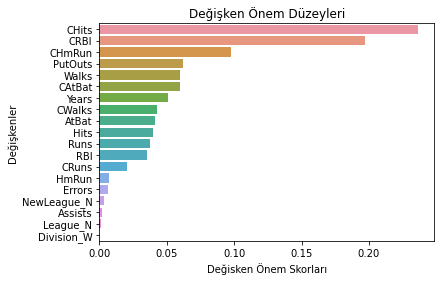

In [41]:
import seaborn as sns
feature_imp = pd.Series(
    gbm_tuned.feature_importances_,
    index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değisken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title('Değişken Önem Düzeyleri')
plt.show()

# eXtreme Gradient Boosting (XGBoost)


XGBoost, GBM'in hız ve tahmin performansını arttırmak üzere optimize edilmiş; ölçeklenebilir ve farklı platformlara entegre edilebilir halidir. 2014 yılında Tianqi Chen tarafından geliştirilmiştir.

  * R, Python, Hodoop, Scala, Julia ile kullanılabilir.
  * Ölçeklenebilir ve hızlıdır.
  * Tahmin başarısı yüksektir.

## Model

In [42]:
xgb_model = XGBRegressor().fit(X_train, y_train)

## Tahmin

In [43]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

355.46515176059927

## Tuning

In [44]:
xgb_params = {'learning_rate': [0.1, 0.01, 0.001],
            'subsample':[0.6, 0.8, 1],
            'n_estimators': [100,500,1000,2000],
            'max_depth':[3,5,7]}

In [45]:
xgb_cv = GridSearchCV(xgb_model, gbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  2.5min finished


In [46]:
xgb_cv.best_params_

{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 1000}

In [47]:
xgb_tuned = XGBRegressor(
    learning_rate = xgb_cv.best_params_['learning_rate'],
    max_depth = xgb_cv.best_params_['max_depth'],
    n_estimators = xgb_cv.best_params_['n_estimators']).fit(X_train, y_train)

In [48]:
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

359.53739693313184

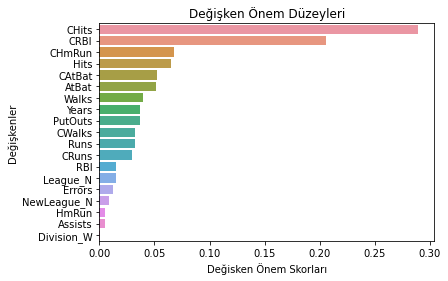

In [49]:
import seaborn as sns
feature_imp = pd.Series(
    xgb_tuned.feature_importances_,
    index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değisken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title('Değişken Önem Düzeyleri')
plt.show()

# LightGBM


LightGBM, XGBoost'un eğitim süresi performansını arttırmaya yönelik geliştirilen GBM türüdür. 2017 yılında Microsoft tarafından geliştirilmiştir.

 * Performansı yüksektir.
 * Level-wise büyüme stratejisi yerine Leaf-wise büyüme stratejisi kullanır.
 BFS yerine DFS kullanır

## Model

In [50]:
lgbm_model = LGBMRegressor().fit(X_train, y_train)

## Tahmin

In [51]:
y_pred = lgbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

363.8712087611089

## Tuning

In [52]:
lgbm_params = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [200,500,100],
    'max_depth':[1,2,35,8]}

In [53]:
lgbm_cv = GridSearchCV(lgbm_model, lgbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 353 out of 360 | elapsed:   15.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   15.7s finished


In [54]:
lgbm_cv.best_params_

{'learning_rate': 0.01, 'max_depth': 35, 'n_estimators': 200}

In [55]:
lgbm_tuned = LGBMRegressor(
    learning_rate = lgbm_cv.best_params_['learning_rate'],
    n_estimators = lgbm_cv.best_params_['n_estimators'],
    max_depth = lgbm_cv.best_params_['max_depth']).fit(X_train, y_train)

In [56]:
y_pred = lgbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

371.48946527867196

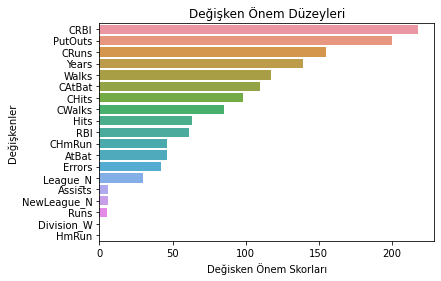

In [57]:
import seaborn as sns
feature_imp = pd.Series(
    lgbm_tuned.feature_importances_,
    index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değisken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title('Değişken Önem Düzeyleri')
plt.show()

# Category Boosting (CatBoost)


Kategorik değişkenler ile otomatik olarak mücadele edebilen, hızlı, başarılı GBM türüdür. 2017 yılında Yandex tarafınfan geliştirilmiştir.

  *  Kategorik değişken desteği.
  *  Hızlı ve ölçeklenebilir GPU desteği.
  *  Daha başarılı tahminler.
  *  Hızlı eğitim ve hızlı tahmin.

## Model

In [58]:
catboost_model = CatBoostRegressor().fit(X_train, y_train, verbose=False)

## Tahmin

In [59]:
y_pred = catboost_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

350.2683163098795

## Tuning

In [60]:
catboost_params = {
    'learning_rate': [0.1, 0.01, 0.003],
    'iterations': [200,500,1000],
    'depth':[4,5,8]}

In [61]:
catboost_cv = GridSearchCV(catboost_model, catboost_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train, verbose=False)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   56.5s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  5.1min finished


In [62]:
catboost_cv.best_params_

{'depth': 5, 'iterations': 500, 'learning_rate': 0.1}

In [63]:
catboost_tuned = CatBoostRegressor(
    learning_rate = catboost_cv.best_params_['learning_rate'],
    iterations = catboost_cv.best_params_['iterations'],
    depth = catboost_cv.best_params_['depth']).fit(X_train, y_train, verbose=False)

In [64]:
y_pred = catboost_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

356.6585457317041

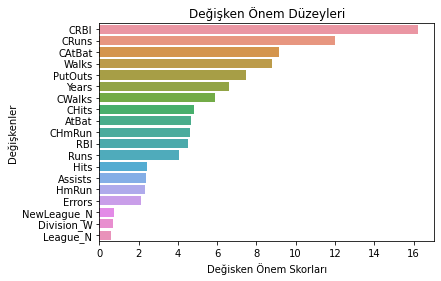

In [65]:
import seaborn as sns
feature_imp = pd.Series(
    catboost_tuned.feature_importances_,
    index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değisken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title('Değişken Önem Düzeyleri')
plt.show()

In [66]:
models = [cart_tuned, bag_tuned, rf_tuned, gbm_tuned, xgb_tuned, lgbm_model, catboost_tuned]
result = []
results = pd.DataFrame(columns=['Models', "RMSE"])

for model in models:
    names = model.__class__.__name__
    print(names)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    result = pd.DataFrame([[names, rmse]], columns=['Models', 'RMSE'])
    results = results.append(result)

DecisionTreeRegressor
BaggingRegressor
RandomForestRegressor
GradientBoostingRegressor
XGBRegressor
LGBMRegressor
CatBoostRegressor


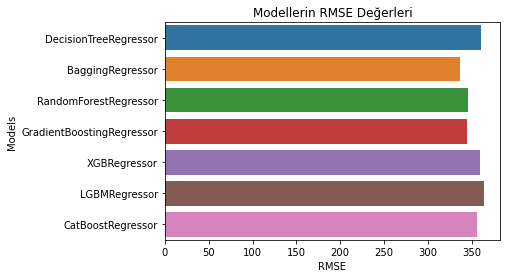

In [67]:
sns.barplot(x='RMSE', y='Models', data=results)
plt.xlabel('RMSE')
plt.title('Modellerin RMSE Değerleri');

## Kaynaklar

### Websiteleri
* https://developers.google.com/machine-learning/crash-course
* https://www.veribilimiokulu.com/bootstrap/
* https://en.wikipedia.org/wiki/Gradient_boosting

### Kurslar
* https://www.udemy.com/course/python-egitimi/